In [51]:
## Automatic read the hand written numbers 
## Solve image classification on a MNist. 
## Bell Begining on 1990, Identify the images in a conveyor belt. While we are doing this. Keep in mind a couple of KPI
## Keras is a library. Comes with toy data sets to drive.
## pip3 install keras tensorflow
## tensorflow
## Keras does not do weights and bias. 
from keras.datasets import mnist ## We imported only one dataset
from keras import models 
from keras import layers ## Newral network contains layers. There is a 1 layer deep.
from keras.utils import to_categorical ## We are importing only one util

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

##Step 1 - Data Pre-processing 
##Step 2 - Train the data 


### Getting the Input Data 

In [8]:
## Use the test data available in Keras. 
(train_images,train_labels),(test_images,test_labels)=mnist.load_data() ## Load the datasets into memory using an api 

11493376/11490434 [==============================] - 7s 1us/step


In [10]:
print(train_images.shape) ## Sample Size, Pixel, Pixel 
print(test_images.shape) ##//Test Images have the same size. Do an 80:20 split or a 70:30 Split 

(60000, 28, 28)
(10000, 28, 28)


In [11]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


### Viewing the training image in Grey scale

In [12]:
print (train_images[0]) ## Grey Scale. Newral network is prepared to have number between 0 and 1 or -1 and 1. It is not a good practise to have bigger numbers. 
## Each image is a tow dimensional array. 


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Viewing the Grey Scale Matrix Image as a real image using Matplotlib

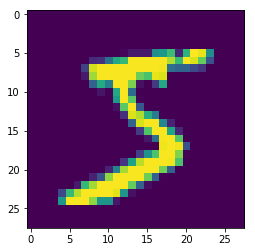

In [17]:
plt.imshow(train_images[0])


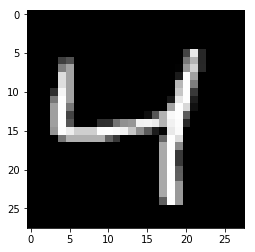

In [19]:
plt.imshow(train_images[0], cmap = 'gray') ## Gray scale 

In [23]:
print(train_labels[0])

5


## Calling a model and also adding layers to the model 

In [65]:
import keras
print (keras.__version__) 

## For the previous version of Keras. Use the below like of code 
##model = models.Sequential()
##model.summary()

model = models.Sequential()
model.add(layers.Dense(
    512,
    activation="relu", 
    input_shape=(28*28,) ## 512 (random number/random guess. how wide the layer is ) is the output. Tensor with 1 dimensionality. ## There is something that goes into 28 * 28 . Something like a Triangle. Goes like into a small number 
)) ##Adding a layer 
model.add(layers.Dense(10,activation="softmax")) ## Adding a second layer.. ## We can keep adding layers. Keras is capable of taking one layer and another and handling it. 
## the 10 above means 10 digits. Its a probability of distribution over all digits. 
model.summary()

model.compile(
    optimizer="rmsprop", ## RMS Prop (Is an optimizer using Gradient Decent) is always good for any deep learning endevaour
    loss = "categorical_crossentropy", ## Everytime a classification problem is used with more than two classes. Use Categorical Crossentropy. Difference between two classes. There is nothing hidden here. 
    metrics=["accuracy"]
    )

## Metric is a measure of how big the error is. Accuracy is how many prediction rigt. Loss is a number. 

2.2.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [64]:
## Loading the image so that we can do the image proessing. 
## Same normalization has to be done in both sets. 
(train_images,train_labels),(test_images,test_labels)=mnist.load_data() ## Load the datasets into memory using an api 
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255 ## Dataflow graphs use floats. Conversion of float is not as important as normalization. 
##print (train_images.shape)
##print (train_images[0])

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255 ## Dataflow grpahs 

train_labels = to_categorical(train_labels) ## Categorical input are many numbers with many 1 and less 0 
test_labels = to_categorical(test_labels)
print(train_labels)

print (test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [60]:
model.fit(
    train_images, 
    train_labels,
    epochs=5, 
    batch_size=128
) ## Watch the accurancy acc 

Epoch 1/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.2564 - acc: 0.9258
Epoch 2/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.1031 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.0676 - acc: 0.9800
Epoch 4/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.0487 - acc: 0.9857
Epoch 5/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.0367 - acc: 0.9893


In [61]:
test_loss,test_acc = model.evaluate(test_images,test_labels)


10000/10000 [==============================] - 1s 82us/step


In [62]:
print(test_loss,test_acc)

0.07112875151471235 0.9781


In [ ]:
##Big Input 
##10 Classes 
##Everything is fully connected 
##IF there are more layers. We can do more feature extraction. 

In [ ]:
## What does acitcation mean. 
# If we hae linear fine tranforms. In order to come up with something nice. We have to make non-linearity. 
# Cascade. we need non-linarity. 
# relu - rectified linear unit. relu(x) = max(01x) Computations very cheap. Very good start for every neural network. Cuts down on the training duration. 
#Best practice to use relu. softmax creates a vector where all number are between 0 and 1 and sum of all numbers is 1.There is no way aroudn softmax. Have to be always used. 
# Its always good practise to put everthing in relu except your output. Softmax makes it slow. 
#Softmax 
